# 1 - 영화 리뷰 데이터를 사용한 특성 벡터 실습

In [2]:
import nltk
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


- fileids() : 영화리뷰 문서들의 id를 반환한다. 매개 변수 categories 를 사용하면 특성 분류에 속하는 문서들의 id만 가져올 수 있다.
- categoreis() : 리뷰 문서들에 대한 분류, 라벨을 보여준다. 여기서는 감성을 표현하는 긍정('pos')와 부정('neg') 값을 갖는다.
- raw() : 리뷰 문서의 원문을 문자열 리스트 형태로 반환한다. 인수로 fileid 를 주면 특성 문서만 가져올 수 있다.

In [3]:
documents = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]
print("리뷰의 수 :", len(documents))

리뷰의 수 : 2000


### sklearn 으로 카운트 벡터 생성
- sklearn.feature_extraction : 텍스트로부터 특성을 추출하는 사이킷런 도구.
- 이 중에 CountVectorizer 는 지금까지 설명한 카운트 기반 문서 표현에 사용되는 클래스이다.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
cv = CountVectorizer(max_features = 2000, min_df = 5, max_df = 0.5)
# 리뷰 문서에 대해서 fit_transform 적용
reviews_cv = cv.fit_transform(documents)

#특성 집합의 단어명을 앞에서부터 10개 출력
print(cv.get_feature_names_out()[:10])

#첫째 리뷰 문서의 앞 10개 특성을 출력
print(reviews_cv[0, :10])


['000' '10' '100' '13' '15' '1995' '1996' '1997' '1998' '1999']
  (0, 1)	10


In [8]:
# 일반적인 행렬로 변환한 형태
print(reviews_cv.toarray()[:5, :5]) # 5개 문서

[[ 0 10  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]


In [9]:
# 값이 있는 셀만 저장한 형태
print(reviews_cv[:5, :5])

  (0, 1)	10


# 한국어 텍스트의 카운트 벡터 변환

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv("./daum_movie_review.csv")
df

,review,rating,date,title
0,돈 들인건 티가 나지만 보는 내내 하품만,1,2018.10.29,인피니티 워
1,몰입할수밖에 없다. 어렵게 생각할 필요없다. 내가 전투에 참여한듯 손에 땀이남.,10,2018.10.26,인피니티 워
2,이전 작품에 비해 더 화려하고 스케일도 커졌지만.... 전국 맛집의 음식들을 한데 ...,8,2018.10.24,인피니티 워
3,이 정도면 볼만하다고 할 수 있음!,8,2018.10.22,인피니티 워
4,재미있다,10,2018.10.20,인피니티 워
...,...,...,...,...
14720,어른들을 위한 동화 정말 오랜만에 좋은 애니를 보았습니다 가족의 소중...,10,2018.01.12,코코
14721,디즈니는 못해도 본전은 한다.,7,2018.01.12,코코
14722,가족을 위한 영화... 괜찮은 영화.~~~,8,2018.01.12,코코
14723,간만에 제대로 잘짜여진 각본의 영화를 봤네 여운이 아직도 남아~어른을 위한 애니~,10,2018.01.12,코코


In [14]:
from konlpy.tag import Okt

In [15]:
okt = Okt()
def my_tokenizer(doc) : # 트위터 형태소 분석기의 pos() 매서드 사용
    return [token for token, pos in okt.pos(doc)
           if pos in['Noun', 'Verb', 'Adjective']] # 명사, 동사, 형용사만을 변환
print("my_tokenizer 결과 : ", my_tokenizer(df.review[1]))

my_tokenizer 결과 :  ['몰입', '할수밖에', '없다', '어렵게', '생각', '할', '필요없다', '내', '전투', '참여', '듯', '손', '땀', '이남']


In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
# 토크나이저와 특성의 최대 개수를 지정
daum_cv = CountVectorizer(max_features = 1000, tokenizer = my_tokenizer)

# review 를 특성 벡터로 변환
daum_result = daum_cv.fit_transform(df.review)
print(daum_cv.get_feature_names_out()[:10]) # 특성 집합 앞 열 개 단어 출력

['가' '가는' '가는줄' '가면' '가서' '가슴' '가장' '가족' '가족영화' '가지']


# 2 - 토픽 모델링으로 주제 찾기

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

# 6개의 주제를 선정
categories = ['alt.atheism', 'talk.religion.misc','comp.graphics', 'sci.space',
             'comp.sys.ibm.pc.hardware', 'sci.crypt']
newsgroups_train = fetch_20newsgroups(subset = 'train', categories= categories)

# 토큰화에 사용할 정규표현식 지정 후 자체적인 불용어 처리 진행
cv = CountVectorizer(token_pattern = "[\w']{3,}", stop_words = 'english',
                    
                    # 최대 단어 수는 2000
                    max_features = 2000, min_df = 5, max_df = 0.5)
reviews_cv = cv.fit_transform(newsgroups_train.data)

In [3]:
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
np.set_printoptions(precision = 3) # 표시할 유효숫자의 범위를 소수점 이하 3자리로 설정

# LDA 객체 생성
lda = LatentDirichletAllocation(n_components = 10, # 추출할 topic의 수
                               max_iter = 5,  # 시간 절약을 위한 최대 횟수 5
                               topic_word_prior = 0.1,   # 주요 예제에서 사용되는 값
                               doc_topic_prior = 1.0,    # 주요 예제에서 사용되는 값
                               learning_method = 'online',   # 빠른 속도를 선택
                               n_jobs = -1,     # 사용 processor 수를 최대로
                               random_state = 0)

# review_cv 에 토픽 모델링을 수행
reviews_topics = lda.fit_transform(reviews_cv)

In [5]:
# 변환된 결과를 각 문서의 토픽 별 비중, 10개 토픽에 대한 0~1 사이의 값이다.
print("Shape of reviews_topics : ", reviews_topics.shape)

# 첫 문서에대한 토픽 비중 - 첫째 토픽에 대한 비중이 가장 높다.
print("Sample of reviews_topics : ", reviews_topics[0])

#토픽의 비중을 전부 더함으로써 말뭉치 전체에 나타난 토픽의 비중을 볼 수 있다.
gross_topic_weights = np.mean(reviews_topics, axis = 0)
print("Sum of topic weights of documents :", gross_topic_weights)

# components_ 속성은 토픽별 단어의 분포를 보여준다.
print('Shpae of topic word distributuon : ', lda.components_.shape)

Shape of reviews_topics :  (3219, 10)
Sample of reviews_topics :  [0.903 0.007 0.027 0.008 0.007 0.008 0.007 0.007 0.007 0.018]
Sum of topic weights of documents : [0.087 0.083 0.085 0.115 0.115 0.126 0.098 0.072 0.07  0.148]
Shpae of topic word distributuon :  (10, 2000)


마지막 토픽의 비중이 0.152로 제일 크고, 다음이 0.132인 5번 비중이다.

In [6]:
# 토픽 별로 비중이 높은 상위 n개의 단어를 출력하는 함수

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx, end='')
        print(
            ", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        )
# 위 slicing에서 맨 뒤 -1은 역순을 의미, 역순으로 했을 때 처음부터
# n_top_words까지
    print()
print_top_words(lda,cv.get_feature_names_out(), 10)

Topic #0: com, morality, keith, article, sgi, think, sandvik, objective, caltech, moral
Topic #1: image, file, graphics, files, ftp, available, software, use, data, mail
Topic #2: space, nasa, access, launch, earth, orbit, shuttle, digex, lunar, satellite
Topic #3: article, com, just, don't, like, i'm, nntp, university, host, posting
Topic #4: key, clipper, chip, encryption, com, government, law, keys, use, escrow
Topic #5: scsi, com, bit, ibm, bus, know, windows, thanks, card, university
Topic #6: host, gov, nntp, posting, university, distribution, nasa, ___, world, com
Topic #7: drive, com, disk, hard, controller, drives, dos, tape, floppy, problem
Topic #8: key, public, message, faq, mail, pgp, des, group, uni, ripem
Topic #9: god, people, don't, jesus, believe, just, does, say, think, know



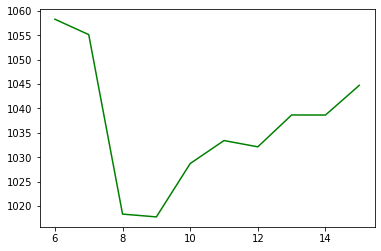

n_components with minimum perplexity: 9


In [10]:
# 최적 토픽 수를 찾는 함수 선언
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def test_perplexity(cv, start=10, end=30, max_iter=5, topic_word_prior=0.1,
                    doc_topic_prior=1.0):
    iter_num = []     # 시도한 n_components 값을 저장할 리스트
    per_value = []    # n_components에 대한 혼란도 지정 리스트
    for i in range(start, end + 1):     # i 는 시도할 n_components 값이다.
        lda = LatentDirichletAllocation(n_components = i, max_iter=max_iter,
            topic_word_prior= topic_word_prior, doc_topic_prior=doc_topic_prior, 
            learning_method='batch', n_jobs= -1, random_state=7)
        lda.fit(cv)
        iter_num.append(i)
        per_value.append(lda.perplexity(cv))  # 계산된 혼란도 값 저장
    plt.plot(iter_num, per_value, 'g-')    # n_components 와 혼란도를 그래프로 시각화
    plt.show()
    return start + per_value.index(min(per_value))   # 혼란도가 가장 낮은 n_components

print("n_components with minimum perplexity:", 
      test_perplexity(reviews_cv, start=6, end=15))

In [21]:
lda = LatentDirichletAllocation(n_components=9, #추출할 topic의 수를 지정 max_iter=20,
                                topic_word_prior=0.1,
                                doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs=-1,
                                random_state=7)
reviews_topics = lda.fit_transform(reviews_cv)
print_top_words(lda, cv.get_feature_names_out(), 10)

Topic #0: image, available, file, data, ftp, mail, information, files, graphics, internet
Topic #1: nasa, gov, space, ___, orbit, posting, center, earth, jpl, research
Topic #2: com, keith, morality, caltech, sgi, objective, moral, think, host, article
Topic #3: com, jesus, just, article, know, god, posting, host, nntp, john
Topic #4: people, god, don't, think, does, say, believe, just, like, evidence
Topic #5: scsi, drive, card, ide, controller, bus, disk, hard, bit, drives
Topic #6: space, access, launch, article, year, just, digex, henry, toronto, moon
Topic #7: key, encryption, clipper, chip, com, government, keys, security, use, public
Topic #8: com, university, posting, nntp, article, host, thanks, i'm, know, help



# GENSIM 를 이용한 토픽 모델링

In [13]:
!pip install gensim

In [14]:
!pip install pyldavis

In [15]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
cachedStopWords = stopwords.words("english")
RegTok = RegexpTokenizer("[\w']{3,}") # 정규포현식으로 토크나이저를 정의
english_stops = set(stopwords.words('english')) # 영어 불용어를 가져옴
def tokenizer(text):
    tokens = RegTok.tokenize(text.lower())
    # stopwords 제외
    words = [word for word in tokens if (word not in english_stops) and len(word) > 2] 
    return words
texts = [tokenizer(news) for news in newsgroups_train.data]

In [16]:
from gensim.corpora.dictionary import Dictionary
# 토큰화 결과로부터 dictionay 생성
dictionary = Dictionary(texts)
print('#Number of initial unique words in documents:', len(dictionary))
# 문서 빈도수가 너무 적거나 높은 단어를 필터링하고 특성을 단어의 빈도 순으로 선택
dictionary.filter_extremes(keep_n = 2000, no_below=5, no_above=0.5)
print('#Number of unique words after removing rare and common words:', len(dictionary))
# 카운트 벡터로 변환
corpus = [dictionary.doc2bow(text) for text in texts] 
print('#Number of unique tokens: %d' % len(dictionary)) 
print('#Number of documents: %d' % len(corpus))

#Number of initial unique words in documents: 46466
#Number of unique words after removing rare and common words: 2000
#Number of unique tokens: 2000
#Number of documents: 3219


In [22]:
from gensim.models import LdaModel
num_topics = 9
passes = 5
model = LdaModel(corpus=corpus, id2word=dictionary,\
                       passes=passes, num_topics=num_topics, \
                       random_state=7)

In [23]:
model.print_topics(num_words=10)

[(0,
  '0.015*"com" + 0.015*"would" + 0.014*"keith" + 0.013*"caltech" + 0.012*"article" + 0.011*"sgi" + 0.011*"nntp" + 0.010*"posting" + 0.010*"host" + 0.009*"system"'),
 (1,
  '0.014*"objective" + 0.013*"com" + 0.013*"article" + 0.012*"uiuc" + 0.012*"say" + 0.012*"morality" + 0.012*"one" + 0.010*"frank" + 0.010*"faq" + 0.009*"values"'),
 (2,
  '0.027*"com" + 0.026*"posting" + 0.026*"host" + 0.026*"nntp" + 0.023*"access" + 0.015*"digex" + 0.014*"article" + 0.013*"university" + 0.012*"pat" + 0.012*"cwru"'),
 (3,
  '0.031*"space" + 0.017*"nasa" + 0.009*"gov" + 0.007*"orbit" + 0.006*"research" + 0.006*"university" + 0.006*"earth" + 0.006*"information" + 0.005*"data" + 0.005*"center"'),
 (4,
  '0.025*"com" + 0.012*"article" + 0.012*"ibm" + 0.011*"would" + 0.010*"henry" + 0.009*"toronto" + 0.009*"one" + 0.009*"like" + 0.009*"get" + 0.008*"work"'),
 (5,
  '0.022*"key" + 0.014*"encryption" + 0.013*"clipper" + 0.012*"chip" + 0.011*"com" + 0.009*"government" + 0.009*"would" + 0.008*"keys" + 0.0

In [24]:
print("#topic distribution of the first document: ", model.get_document_topics(corpus)
[0])

#topic distribution of the first document:  [(0, 0.6954689), (8, 0.30036935)]


In [25]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
# LDA 모형을 pyLDAvis 객체에 전달
lda_viz = gensimvis.prepare(model, corpus, dictionary)
lda_viz

C:\Users\user\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.130150 -0.013672       1        1  25.343044
5     -0.045430  0.060721       2        1  17.432935
7     -0.102660  0.109900       3        1  13.127730
3     -0.079762 -0.047378       4        1  11.904442
6     -0.064647  0.059494       5        1  10.740742
4     -0.019337 -0.061164       6        1   6.844559
0      0.036647 -0.108800       7        1   5.852298
2     -0.026342 -0.093757       8        1   4.796284
1      0.171381  0.094656       9        1   3.957966, topic_info=         Term         Freq        Total Category  logprob  loglift
538     space  1518.000000  1518.000000  Default  30.0000  30.0000
20        com  3720.000000  3720.000000  Default  29.0000  29.0000
834       key  1331.000000  1331.000000  Default  28.0000  28.0000
1551     scsi   711.000000   711.000000  Default  27.0000  27.0000
70    posting  1737.000000  1737.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
70    posting    78.129791  1737.659389   Topic9  -5.1370   0.1275
100     would    79.169174  2723.205949   Topic9  -5.1238  -0.3085
364       way    68.384512   872.079222   Topic9  -5.2702   0.6837
176   science    65.036149   546.854822   Topic9  -5.3204   1.1002
294      time    65.998295  1182.521843   Topic9  -5.3057   0.3437

[541 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1359      1  0.012630      128
1359      2  0.075781      128
1359      3  0.865171      128
1359      4  0.037891      128
224       1  0.031218     1990
...     ...       ...      ...
704       6  0.880854      zoo
704       7  0.100448      zoo
704       8  0.007727      zoo
705       6  0.970333  zoology
705       7  0.014270  zoology

[2302 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 6, 8, 4, 7, 5, 1, 3, 2])